# Task

1. `ipywidgets`
  - [jupyter-widgets](https://ipywidgets.readthedocs.io/en/latest/index.html)
  - [interact](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html)
---
2. Create / save image
  - pattern of ellipse
  - the x and y coordinate range from - 150 to 150 for the 300 dimension image
  - `np.meshgrid()`
  - $[(x/a)^2 + (y/b)^2]^{0.5} = 1$
  ---
3. Pillow (PIL) [module](https://pillow.readthedocs.io/en/stable/index.html):
  - create image
  - save array as image ([formats](https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html))
  - crop
  - rotate
  - resize
---

4. Histogram:
  - create (`PIL`, `np`)
  - thresholding
  
5. Histogram progowanie
6. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from ipywidgets import interact

In [2]:
def f1(a):
    x = np.arange(-10,10)
    y = x**a
    plt.plot(x,y,'or')

In [5]:
interact(f1,a=(1,6))

interactive(children=(IntSlider(value=3, description='a', max=6, min=1), Output()), _dom_classes=('widget-inte…

<function __main__.f1(a)>

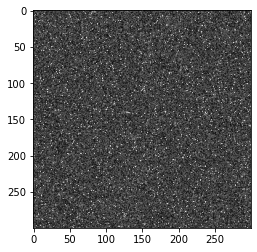

In [7]:
np.random.seed(99)  # set seed, always the same results of randoming
ar = np.random.normal(loc=50,scale=25,size=(300,300)).astype(np.uint8)
plt.imshow(ar,cmap=plt.cm.Greys_r)

In [21]:
def fel1(a,b,k,n,test=True):
    ar = np.random.normal(loc=50,scale=25,size=(300,300)).astype(np.uint8)
    s = int(ar.shape[0]/2) 
    x,y = np.arange(-s,s), np.arange(-s,s)
    x1,y1 = np.meshgrid(x,y)
    
    rr = ((x1/a)**2 + (y1/b)**2)**0.5
    #plt.imshow(rr,cmap=plt.cm.Greys_r)
    
    size = ar[(rr>k) & (rr<n)].size
    
    ar[(rr>k) & (rr<n)] = np.random.normal(loc=210,scale=20,size=size).astype(np.uint8)
    
    if test:
        plt.imshow(ar,cmap=plt.cm.Greys_r)
    else:
        return ar

In [23]:
interact(fel1,a=(1,20),b=(1,20),k=(1,10),n=(1,10))

interactive(children=(IntSlider(value=10, description='a', max=20, min=1), IntSlider(value=10, description='b'…

<function __main__.fel1(a, b, k, n, test=True)>

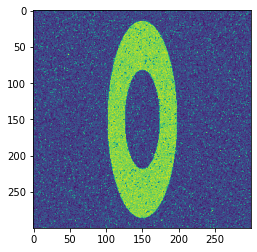

In [30]:
ar = fel1(6,17,4,8,test=0)
plt.imshow(ar);

In [33]:
im = Image.fromarray(ar)
type(im)

PIL.Image.Image

In [40]:
%cd imProcActual/

/home/u1/22_dydaktyka/05imProc/imProcActual


In [42]:
im.save('im1.jpg')
%ls

april14.ipynb  imgs/       lab2.ipynb   Untitled.ipynb
im1.jpg        lab1.ipynb  today.ipynb


---

## Tranformations (basic)

In [54]:
def rr(an,ex,c):
    new = im.rotate(an,fillcolor=c,expand=ex)
    plt.imshow(new,cmap=plt.cm.Greys_r)
    
interact(rr,an=(0,180,18),ex=[True,False],c=(0,255,15))

interactive(children=(IntSlider(value=90, description='an', max=180, step=18), Dropdown(description='ex', opti…

<function __main__.rr(an, ex, c)>

In [56]:
%ls imgs/

cameraman.tif  lena_color_512.tif  peppers_color.jpg
house.tif      lena_gray_512.tif


In [98]:
# open() / close()

im2 = Image.open('imgs/cameraman.tif')
im3 = Image.open('imgs/lena_gray_512.tif')

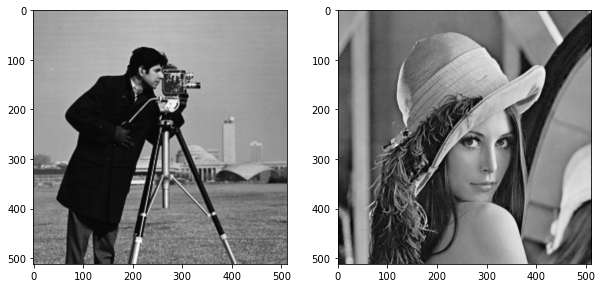

In [63]:
f = plt.figure(figsize=(10,5))
plt.gray()

plt.subplot(1,2,1)
plt.imshow(im2)

plt.subplot(1,2,2)
plt.imshow(im3);

In [65]:
type(im3), im3.info

(PIL.TiffImagePlugin.TiffImageFile, {'compression': 'raw', 'dpi': (72, 72)})

In [70]:
im.getbands(), im2.getbands(),im3.getbands()

(('L',), ('L',), ('L',))

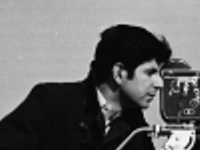

In [89]:
im2.crop((100,50,300,200))

In [92]:
def res(w,h):
    new = im2.resize((w,h))
    plt.imshow(new)
    
interact(res,w=(10,500),h=(10,500))

interactive(children=(IntSlider(value=255, description='w', max=500, min=10), IntSlider(value=255, description…

<function __main__.res(w, h)>

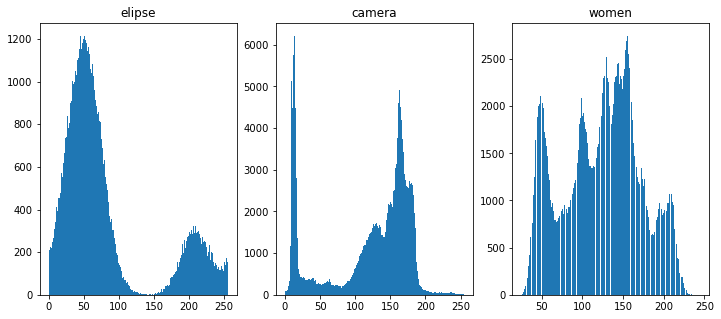

In [106]:
f= plt.figure(figsize=(12,5))

imgs = [im,im2,im3]
tit = ['elipse','camera','women']

for i,imm in enumerate(imgs,1):
    plt.subplot(1,3,i)
    tmp = np.asarray(imm)
    plt.hist(tmp.ravel(),bins=256)
    plt.title(tit[i-1])

In [105]:
list(enumerate([99,88,'aa'],1000))

[(1000, 99), (1001, 88), (1002, 'aa')]

In [107]:
# thresholding

def thr(t):
    ar = np.asarray(im).copy()
    idx = ar < t
    ar[idx] = 0
    ar[~idx] = 1
    plt.gray()
    plt.imshow(ar)
    
interact(thr,t=(0,255,10))

interactive(children=(IntSlider(value=120, description='t', max=255, step=10), Output()), _dom_classes=('widge…

<function __main__.thr(t)>

In [108]:
# thresholding

def thr(t):
    ar = np.asarray(im2).copy()
    idx = ar < t
    ar[idx] = 0
    ar[~idx] = 1
    plt.gray()
    plt.imshow(ar)
    
interact(thr,t=(0,255,10))

interactive(children=(IntSlider(value=120, description='t', max=255, step=10), Output()), _dom_classes=('widge…

<function __main__.thr(t)>

In [269]:
# thresholding

def thr(t1,t2,t3):
    ar = np.asarray(im2).copy()
    ar1 = ar.copy()
    idx1 = ar < t1
    ar[idx1] = 1
    idx2 = (ar >= t1) & (ar < t2)
    idx3 = (ar >= t2) & (ar < t3)
    #idx4 = (ar >= t3) & (ar < t4)
    idx4 = ar >= t3

    ar[idx2] = 2
    ar[idx3] = 3
    ar[idx4] = 4
    #ar[idx5] = 5
    plt.gray()
    plt.gray()
    
    f, axs = plt.subplots(1, 3,figsize=(12,4))
    axs[0].imshow(ar)
    axs[1].hist(ar.ravel());
    axs[2].hist(ar1.ravel(),bins=256);
    plt.tight_layout();

<Figure size 432x288 with 0 Axes>

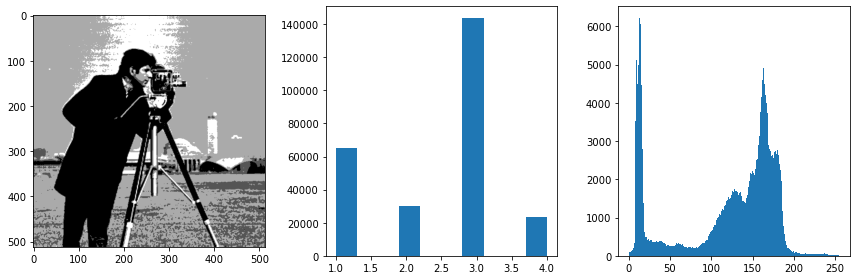

In [270]:
thr(70,120,180)

In [261]:
# thresholding

def thr1(**tr):
    ar, ar1 = np.asarray(im2).copy(), np.asarray(im2).copy()
    n = len(tr)
    tr = list(tr.values())
    
    if n == 1: # single threshold
        idx = ar < tr[0]
        ar[idx] = 1
        ar[~idx] = 2
    
    else:  # many thresholds
        k = 0 # class number
        idx1 = np.empty([])  # outer index for last trhesholds
        
        for i in range(n):
            k += 1
            
            if i == 0: # for first threshold
                idx = ar < tr[i] #tr[0]
            else:
                idx = (ar >= tr[i-1]) & (ar < tr[i])
                
                if i == n-1: # set outer index for last trhesholds
                    idx1 = ar >= tr[i]
             
            ar[idx] = k
            if not np.all(idx1):
                ar[idx1] = k+1 # last class

    plt.gray()
    f, axs = plt.subplots(1, 3,figsize=(12,4))

    axs[0].imshow(ar)
    axs[1].hist(ar.ravel());
    axs[2].hist(ar1.ravel(),bins=256);
    plt.tight_layout();

<Figure size 432x288 with 0 Axes>

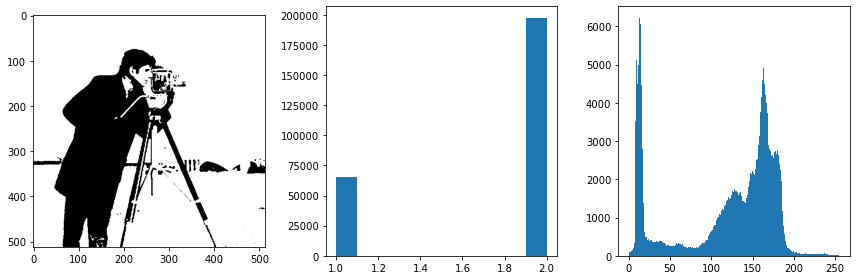

In [262]:
thr1(t1=70)

In [263]:
interact(thr1,t1=(0,255,20))

interactive(children=(IntSlider(value=120, description='t1', max=255, step=20), Output()), _dom_classes=('widg…

<function __main__.thr1(**tr)>

<Figure size 432x288 with 0 Axes>

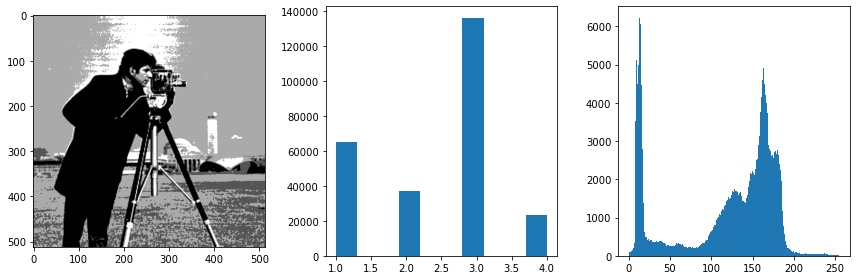

In [264]:
thr1(t1=70, t2= 125, t3=180)

In [265]:
interact(thr1,t1=(0,70,10),t2=(80,155,10),t3=(165,255,10))

interactive(children=(IntSlider(value=30, description='t1', max=70, step=10), IntSlider(value=110, description…

<function __main__.thr1(**tr)>